<a href="https://colab.research.google.com/github/bskrish757/AIML/blob/main/Capstone_RSNA_Pneumonia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: 
Pneumonia is a deadly disease which accounts to top 10 causes of deaths world wide especially childrens.
Diagnosis of this disease is done through the review of Chest Radiograph images,
pneumonia appears to be areas of high opacity in these images, as the areas affected in lungs will be filled with mucus/pus and doesnot allow xrays to pass through.

The challenge in diagnosing pneumonia through CXR images are
* Only the highly trained specialist doctors have to review the Chest Radiograph images, patients clinical history and has to take a lot of laboratory examinations for confirmation.
* The conditions such as fluid overload also appears to be the areas with high opacity in these images.
* The specialist have to review lot of images per shift making room for human errors aswell.

So to solve these problems a dataset of CXRs is provided by medical associations accross the globe,
Through Machine learning we have to develop a model which will help to automate the initial detection of potential pneumonia cases.


### Data Descrption: 

### Expected output:


# Download Kaggle

Steps to download:
1. Create an acccout in https://www.kaggle.com/ with the account you signed in to google colab,drive
2. Go to account settings --> API -->Create New API Token
3. A kaggle.json file will be downloaded, copy it to the google drive location
4. and use it in the below steps wherever specified

In [1]:
!pip install kaggle

In [1]:
#Make a directory for Kaggle
!mkdir .kaggle

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [10]:
#Copy kaggle.json file which 
!cp '/gdrive/My Drive/Colab Notebooks/kaggle.json' /content/.kaggle/kaggle.json

In [11]:
#Check if json file is there
!ls -l /content/.kaggle

total 4
-rw------- 1 root root 65 Jun 12 15:03 kaggle.json


In [12]:
!mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [13]:
!cp /content/.kaggle/kaggle.json  ~/.kaggle

In [14]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [15]:
!chmod 600 /root/.kaggle/kaggle.json

In [16]:
#To Avoid the error "Warning: Looks like you're using an outdated API Version, please consider updating (server 1.5.12 / client 1.5.4)" 
#and also to download dataset properly the below command is neccessary
!pip install --upgrade --force-reinstall --no-deps kaggle --quiet

# Download RSNA competition dataset

In [17]:
!kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-09 12:09:58           7340        646  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4451        368  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1507        130  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

In [18]:
#Download data from Kaggle for RSNA PNEUMONIA DETECTION and copy it to /content folder
!kaggle competitions download -c rsna-pneumonia-detection-challenge -p /content

100% 3.66G/3.66G [01:08<00:00, 26.8MB/s]
100% 3.66G/3.66G [01:08<00:00, 57.4MB/s]


In [19]:
!unzip -q rsna-pneumonia-detection-challenge.zip 

In [20]:
!ls -l

total 3845352
-rw-r--r-- 1 root root         55 Dec 11  2019 'GCP Credits Request Link - RSNA.txt'
-rw-r--r-- 1 root root 3932287530 Jun 12 15:05  rsna-pneumonia-detection-challenge.zip
drwxr-xr-x 1 root root       4096 Jun  1 13:40  sample_data
-rw-r--r-- 1 root root    1647396 Dec 11  2019  stage_2_detailed_class_info.csv
-rw-r--r-- 1 root root     159027 Dec 11  2019  stage_2_sample_submission.csv
drwxr-xr-x 2 root root     212992 Jun 12 15:05  stage_2_test_images
drwxr-xr-x 2 root root    1822720 Jun 12 15:06  stage_2_train_images
-rw-r--r-- 1 root root    1490034 Dec 11  2019  stage_2_train_labels.csv


In [21]:
!ls  stage_2_train_images/ | wc -l

26684


In [22]:
!ls  stage_2_test_images/ | wc -l

3000


# EDA using pandas

In [23]:
# Import the pandas and numpy packages for eda
import pandas as pd
import numpy as np

In [24]:
train_labels_df = pd.read_csv('stage_2_train_labels.csv')

In [25]:
train_labels_df.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [26]:
train_labels_df['Target'].unique()

array([0, 1])

In [27]:
train_labels_df.shape

(30227, 6)

In [28]:
train_labels_df.patientId.unique().shape

(26684,)

In [29]:
train_labels_df.dtypes

patientId     object
x            float64
y            float64
width        float64
height       float64
Target         int64
dtype: object

In [30]:
train_labels_df.isnull().sum() 
#Out of 30227 rows, 20672 do not have bounding boxes, which according to the data set description are normal

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

## Observations from training_labels csv file
1. There are 2 classes/targets -> 0-Normal , 1-Pneumonia
2. There are around 30227 examples in the training data
3. Out of the total examples 26684 are unique, which means remaining are duplicate of one or the other patient, where it means that there are more than 1 bounding boxes for some patients
4. Some Patients which are classified as NORMAL do not have bounding boxes in the training data
5. Observed that there are around 20,672 patients are normal and have NULL values for the bounding box co-ordinates x,y, width,height 

In [31]:
class_info_df = pd.read_csv('stage_2_detailed_class_info.csv')

In [32]:
class_info_df.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [33]:
class_info_df.shape
#the class info details are having same number of rows or patient details

(30227, 2)

In [34]:
class_info_df['class'].unique()

array(['No Lung Opacity / Not Normal', 'Normal', 'Lung Opacity'],
      dtype=object)

In [35]:
# If we want to keep the class name mapped in the training labels file, we can check if the patientId's are same as in the detailed class info, 
# if they are same Append the class names in the class data set 'stage_2_detailed_class_info.csv' to 'stage_2_train_labels.csv'
if (True == train_labels_df['patientId'].equals(other=class_info_df['patientId'])):
    train_labels_df['class'] = class_info_df['class'].copy()

In [63]:
# We cannot give NAN, zeroes or  values greater than image size for bounding boxes to the model as per my understanding the
# so we can do  one thing we can write out the code for imuting these values to image size or mean value
train_df_median_imputed = train_labels_df.copy()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
train_df_median_imputed.iloc[:,1:5] = imputer.fit_transform(train_df_mean_imputed.iloc[:,1:5])
train_df_median_imputed.isnull().sum()

patientId    0
x            0
y            0
width        0
height       0
Target       0
class        0
dtype: int64

In [ ]:
# We cannot give NAN, zeroes or  values greater than image size for bounding boxes to the model as per my understanding the
# so we can do  one thing we can write out the code for imuting these values to image size or mean value
train_df_mean_imputed = train_labels_df.copy()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
train_df_mean_imputed.iloc[:,1:5] = imputer.fit_transform(train_df_mean_imputed.iloc[:,1:5])
train_df_mean_imputed.isnull().sum()

In [37]:
#Check if the class names and target mappings as pet the training labels data
#patient Id = 0004cfab-14fd-4e49-80ba-63a80b6bddd6 is of class No Lung Opacity / Not Normal
train_labels_df[train_labels_df['patientId'] == '0004cfab-14fd-4e49-80ba-63a80b6bddd6']

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal


In [38]:
#Check if the class names and target mappings as pet the training labels data
#patient Id = 003d8fa0-6bf1-40ed-b54c-ac657f8495c5 is of class 'Normal'
train_labels_df[train_labels_df['patientId'] == '003d8fa0-6bf1-40ed-b54c-ac657f8495c5']

,patientId,x,y,width,height,Target,class
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal


In [39]:
#Check if the class names and target mappings as pet the training labels data
#patient Id = 00436515-870c-4b36-a041-de91049b9ab4 is of class 'Lung Opacity'
train_labels_df[train_labels_df['patientId'] == '00436515-870c-4b36-a041-de91049b9ab4']

,patientId,x,y,width,height,Target,class
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1,Lung Opacity


In [40]:
train_labels_df[train_labels_df['x'].max() == train_labels_df.x]

,patientId,x,y,width,height,Target,class
29048,02475a31-ed48-4ff3-b401-5d74694bff8d,835.0,474.0,112.0,172.0,1,Lung Opacity


In [41]:
train_labels_df[train_labels_df['x'].min() == train_labels_df.x]

,patientId,x,y,width,height,Target,class
3167,36994bd6-13dc-405e-9f98-680a0e5b2eea,2.0,483.0,273.0,435.0,1,Lung Opacity
13510,87bea6bd-4a01-4fad-8621-8e641e09dcad,2.0,383.0,326.0,289.0,1,Lung Opacity
14492,8f202a05-d9d3-43c2-aa4b-0ab8939f0607,2.0,236.0,348.0,551.0,1,Lung Opacity


In [42]:
train_labels_df.describe()

,x,y,width,height,Target
count,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
mean,394.047724,366.839560,218.471376,329.269702,0.316108
std,204.574172,148.940488,59.289475,157.750755,0.464963
min,2.000000,2.000000,40.000000,45.000000,0.000000
25%,207.000000,249.000000,177.000000,203.000000,0.000000
50%,324.000000,365.000000,217.000000,298.000000,0.000000
75%,594.000000,478.500000,259.000000,438.000000,1.000000
max,835.000000,881.000000,528.000000,942.000000,1.000000


In [43]:
train_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [44]:
# BOx plot for x, y, width, height
import seaborn as sns
import matplotlib.pyplot as plt

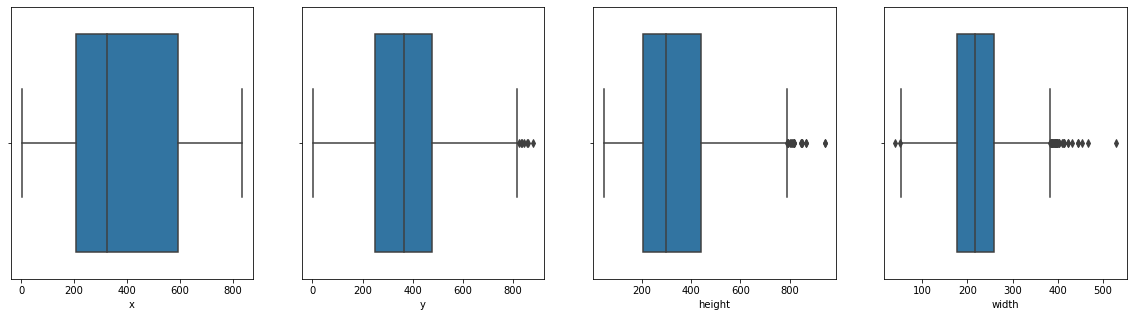

In [45]:
fig, ax = plt.subplots(1,4)
fig.set_size_inches(20, 5)
sns.boxplot(x='x', data=train_labels_df, ax=ax[0])
sns.boxplot(x='y', data=train_labels_df, ax=ax[1])
sns.boxplot(x='height', data=train_labels_df, ax=ax[2])
sns.boxplot(x='width', data=train_labels_df, ax=ax[3])

# Here we can see that the height, width and y coordinate has some outliers, which means the bounding boxes in some cxr images of patients are bigger
# We have to decide whether we need to really change them and bring back to mean position or any other quartile value
# If we do that then our bounding boxes which capture the opacity may go wrong, so we can observe some example bounding boxes on the training images which are treated as outliers 

In [46]:
#Display the patientId which have outliers in there data
#store them in a different data frames
h1 =  train_labels_df['height'].quantile(0.25)
h3 = train_labels_df['height'].quantile(0.75)
IQR_H = h3 - h1
print(f"The highest whisker value of Height is : {h3 + IQR_H*1.5}")

w1 =  train_labels_df['width'].quantile(0.25)
w3 = train_labels_df['width'].quantile(0.75)
IQR_W = w3 - w1
print(f"The highest whisker value of weight is : {w3 + IQR_W*1.5}")

y1 =  train_labels_df['y'].quantile(0.25)
y3 = train_labels_df['y'].quantile(0.75)
IQR_Y = y3 - y1
print(f"The highest whisker value of y is : {y3 + IQR_Y*1.5}")

The highest whisker value of Height is : 790.5
The highest whisker value of weight is : 382.0
The highest whisker value of y is : 822.75


In [47]:
print("The number of patients having bounding box heights treated as outliers = ", train_labels_df[(train_labels_df['height'] > h3+1.5*IQR_H) | (train_labels_df['height'] < h1 -1.5*IQR_H)].shape[0])
print("The number of patients having bounding box width treated as outliers = ", train_labels_df[(train_labels_df['width'] > w3+1.5*IQR_W) | (train_labels_df['width'] < w1 -1.5*IQR_W)].shape[0])
print("The number of patients having bounding box y co-ordinate treated as outliers = ", train_labels_df[(train_labels_df['y'] > y3+1.5*IQR_Y) | (train_labels_df['y'] < y1 -1.5*IQR_Y)].shape[0])

The number of patients having bounding box heights treated as outliers =  18
The number of patients having bounding box width treated as outliers =  38
The number of patients having bounding box y co-ordinate treated as outliers =  7


In [48]:
# we cannot change the width height or y coordinate directly, so we will observe the output of some of these
# and check if the bounding boxes are not properly defined and remove if required

In [49]:
train_height_outliers =  train_labels_df[(train_labels_df['height'] > h3+1.5*IQR_H) | (train_labels_df['height'] < h1 -1.5*IQR_H)]
train_height_outliers

,patientId,x,y,width,height,Target,class
241,0637b804-e693-48d1-8716-f7c63ce6162a,507.0,109.0,344.0,808.0,1,Lung Opacity
3808,3accdbb1-0300-4065-8757-94eb3dd213c3,123.0,204.0,332.0,816.0,1,Lung Opacity
3809,3accdbb1-0300-4065-8757-94eb3dd213c3,621.0,172.0,339.0,852.0,1,Lung Opacity
4097,3ca6661a-ffbd-4d4d-b49b-c96cfd218307,87.0,104.0,310.0,793.0,1,Lung Opacity
4098,3ca6661a-ffbd-4d4d-b49b-c96cfd218307,549.0,82.0,280.0,942.0,1,Lung Opacity
4357,3e62e51c-befb-4a66-b28e-fc469b19e4a8,148.0,87.0,366.0,867.0,1,Lung Opacity
4358,3e62e51c-befb-4a66-b28e-fc469b19e4a8,620.0,82.0,335.0,942.0,1,Lung Opacity
13699,893b6861-0bfc-4e9f-94d4-3a967dda4223,156.0,28.0,320.0,816.0,1,Lung Opacity
14917,92a2dfab-f33a-4324-953a-afe96680c541,102.0,196.0,325.0,805.0,1,Lung Opacity
14918,92a2dfab-f33a-4324-953a-afe96680c541,520.0,201.0,374.0,817.0,1,Lung Opacity


In [50]:
train_width_outliers = train_labels_df[(train_labels_df['width'] > w3+1.5*IQR_W) | (train_labels_df['width'] < w1 -1.5*IQR_W)]
train_width_outliers

,patientId,x,y,width,height,Target,class
400,074f8729-c5ea-4830-8249-9a04208eab5e,13.0,526.0,422.0,296.0,1,Lung Opacity
401,074f8729-c5ea-4830-8249-9a04208eab5e,611.0,515.0,393.0,327.0,1,Lung Opacity
430,077ff78d-27ef-49d4-9e8e-00e458844a3e,550.0,129.0,386.0,745.0,1,Lung Opacity
591,08da8f40-b186-473b-9fa3-1caa4ecdc02b,496.0,130.0,394.0,755.0,1,Lung Opacity
642,0930b0aa-25c2-4624-a3fc-9b60ba0b23f4,471.0,8.0,445.0,568.0,1,Lung Opacity
678,097788d4-cb88-4457-8e71-0ca7a3da2216,226.0,189.0,528.0,703.0,1,Lung Opacity
754,0a03fbf6-3c9a-4e2e-89ce-c7629ae43a27,582.0,522.0,403.0,444.0,1,Lung Opacity
817,0aa43663-a1f3-44cb-8ecc-9b36fbb0d778,486.0,129.0,397.0,649.0,1,Lung Opacity
1043,0c391e0f-9927-48ce-801f-02eb000f72c3,486.0,230.0,467.0,738.0,1,Lung Opacity
1108,0cc09b0a-1afc-4492-929e-ac53f15286b6,538.0,282.0,388.0,491.0,1,Lung Opacity


In [51]:
train_y_outliers = train_labels_df[(train_labels_df['y'] > y3+1.5*IQR_Y) | (train_labels_df['y'] < y1 -1.5*IQR_Y)]
train_y_outliers

,patientId,x,y,width,height,Target,class
52,01be392f-a46d-4aef-a57e-9cd1a80dd47e,175.0,825.0,168.0,109.0,1,Lung Opacity
2495,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
3185,36c50ee5-7885-4c34-8f24-829f85cea256,583.0,836.0,148.0,177.0,1,Lung Opacity
4504,3f4eae54-fb2b-4616-a32f-c42f7df570b7,135.0,832.0,155.0,134.0,1,Lung Opacity
10900,729f2aa0-9564-4228-b516-1d8d4be8bb55,574.0,845.0,165.0,110.0,1,Lung Opacity
10920,72dc0bc2-8c6a-4214-b06f-862e9e8444bd,586.0,859.0,174.0,105.0,1,Lung Opacity
25982,e821a416-aed0-411d-ab8a-7813185384b9,39.0,881.0,108.0,128.0,1,Lung Opacity


In [52]:
#Example of duplicates in patient ID and there respective bounding boxes
train_labels_df[train_labels_df['patientId'] == '32408669-c137-4e8d-bd62-fe8345b40e73']

,patientId,x,y,width,height,Target,class
2495,32408669-c137-4e8d-bd62-fe8345b40e73,273.0,856.0,234.0,101.0,1,Lung Opacity
2496,32408669-c137-4e8d-bd62-fe8345b40e73,702.0,801.0,249.0,144.0,1,Lung Opacity
2497,32408669-c137-4e8d-bd62-fe8345b40e73,300.0,367.0,226.0,423.0,1,Lung Opacity
2498,32408669-c137-4e8d-bd62-fe8345b40e73,706.0,360.0,232.0,238.0,1,Lung Opacity


# VISUALIZATION

In [53]:
import matplotlib.pyplot as plt
import cv2

!pip install pydicom

     |████████████████████████████████| 1.9MB 5.1MB/s 


In [54]:
import pydicom as dicom
import matplotlib.patches as patches
import math

In [55]:
img_path = 'stage_2_train_images'

In [56]:
def display_image_and_bounding_boxes(df, img_num_list, img_path, fig_height=20, fig_width=10):    
    num_rows = math.ceil(len(img_num_list)/4)
    num_cols = 4    
    fig, ax = plt.subplots(num_rows, num_cols, figsize=(fig_height,fig_width))
    row = 0
    col = 0
    for img_num in img_num_list:
        #Read the image
        img_file = df.loc[img_num, 'patientId']
        #Find all images with this patient id
        rows_with_patientid = df[(df.patientId == img_file)].index.tolist()
        for i in rows_with_patientid:              
            #Get bounding box
            xmin, ymin, width, height = df.loc[i, ['x', 'y', 'width', 'height']]
            xmax = xmin+width
            ymax = ymin+height
            #img = cv2.imread(img_path + '/' + img_file+'.dcm')
            
            ds = dicom.dcmread(img_path + '/' + img_file+'.dcm')

            #print using cv requires xmax, ymax instead of height ad width and in int format
            #opecv needs values in int format, our values are in float
            #xmin = xmin.astype('int')
            #ymax= ymax.astype('int')
            #xmax = xmax.astype('int')
            #ymin= ymin.astype('int')      
            #cv2.rectangle(ds.pixel_array, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
            #Get Label and Add text 
            #cv2.putText(ds.pixel_array,label,(xmin, ymin),cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)

            rect = patches.Rectangle((xmin,ymin), width, height, linewidth=2, edgecolor='r', facecolor='none')
            ax[row, col].add_patch(rect)            
            ax[row, col].set_title(ds.PatientID)
            
        #ds.pixel_array = cv2.cvtColor(ds.pixel_array, cv2.COLOR_BGR2RGB)
        #ax[row, col].grid(None)
        ax[row, col].imshow(ds.pixel_array, cmap=plt.cm.gray)
        col = col+1
        if (col == num_cols):
            row = row+1
            col = 0            

    plt.show()
        

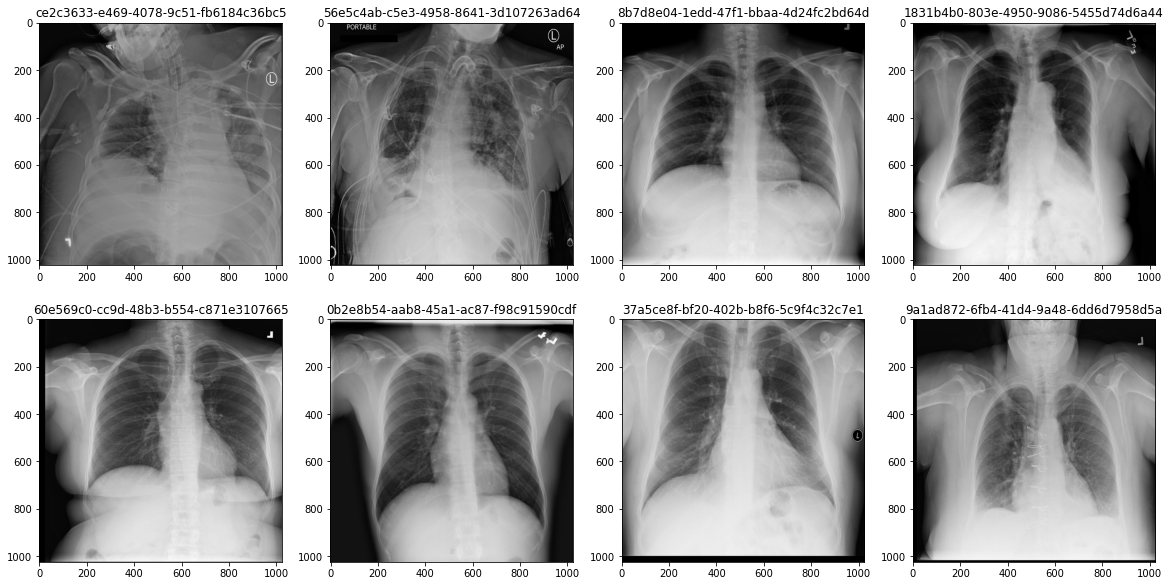

In [57]:
#Diplay the negative cases without bounding boxes, print random values
train_negative = train_labels_df[train_labels_df['Target'] == 0].copy().reset_index(drop=True)

#Get some 6 random numbers and display those images
img_num = [np.random.randint(0, train_negative.shape[0]) for i in range(8)]
display_image_and_bounding_boxes(train_negative, img_num, img_path)

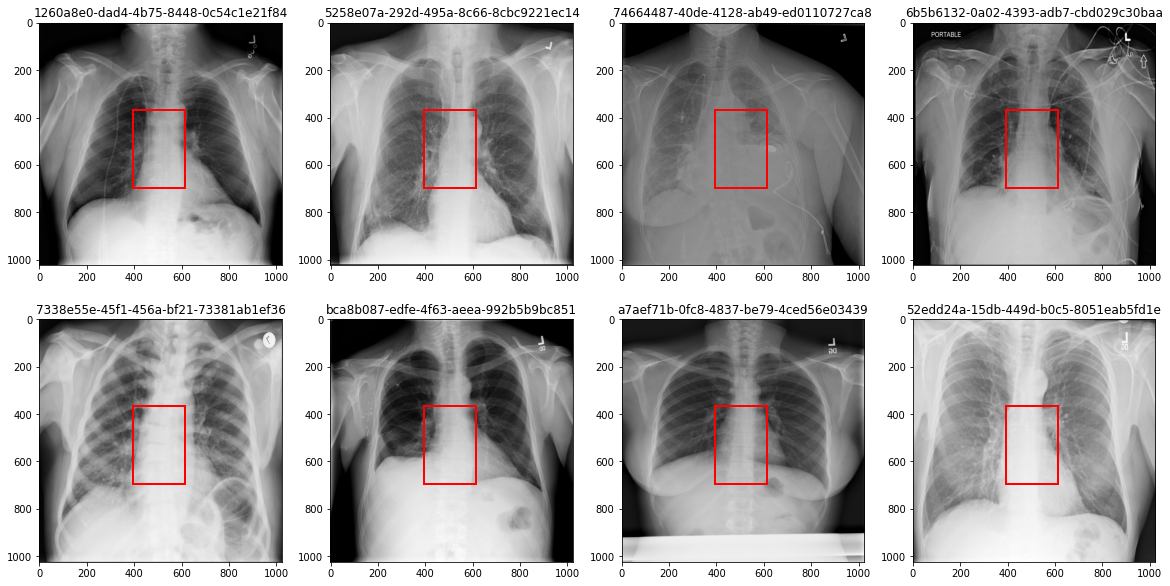

In [64]:
#Diplay the negative cases with bounding boxes, print random values
train_negative = train_df_median_imputed[train_df_mean_imputed['Target'] == 0].copy().reset_index(drop=True)

#Get some 6 random numbers and display those images
img_num = [np.random.randint(0, train_negative.shape[0]) for i in range(8)]
display_image_and_bounding_boxes(train_negative, img_num, img_path)

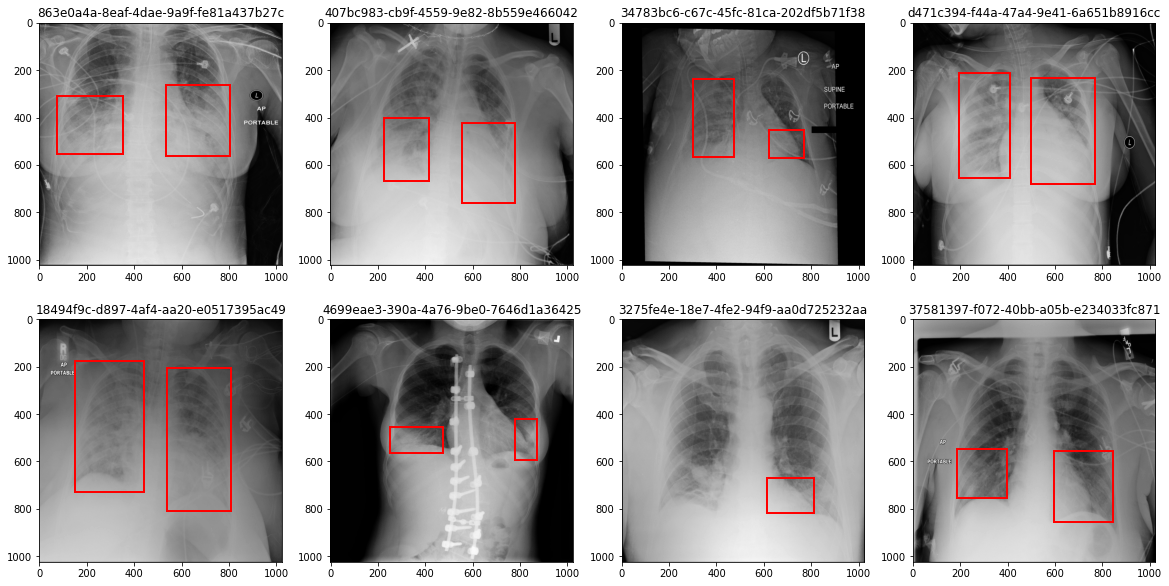

In [59]:
#Diplay the positive cases with bounding boxes
train_positive = train_labels_df[train_labels_df['Target'] == 1].copy().reset_index(drop=True)

#Get some 6 random numbers and display those images
img_num = [np.random.randint(0, train_positive.shape[0]) for i in range(8)]
display_image_and_bounding_boxes(train_positive, img_num, img_path)

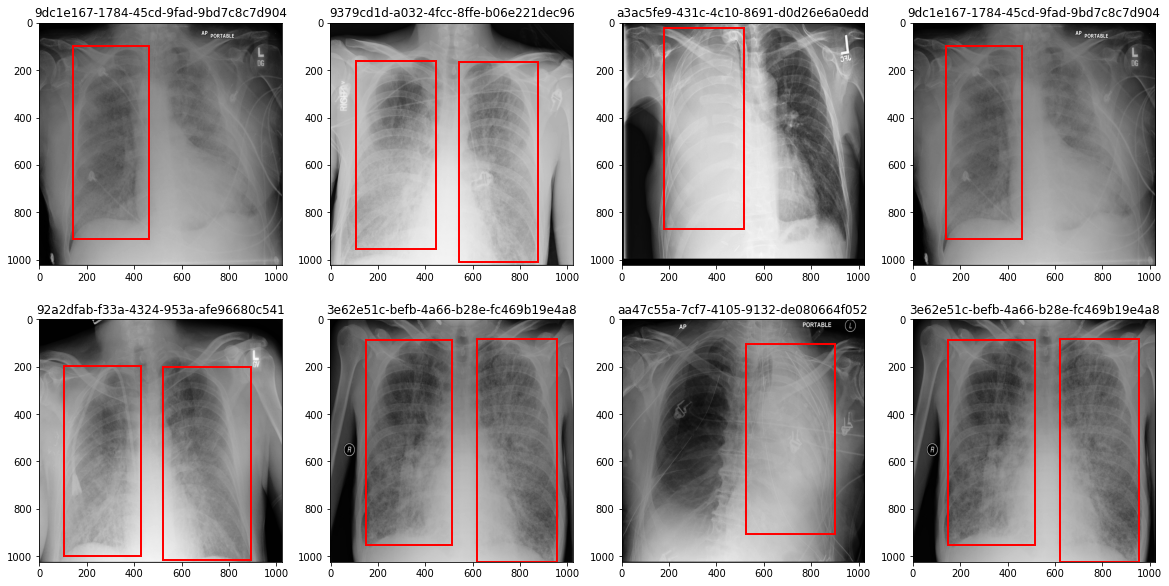

In [60]:
#Diplay the outlier image cases with bounding boxes
df = train_height_outliers.copy().reset_index(drop=True)

#Get more than 4 random numbers and display those images
img_num = [np.random.randint(0, df.shape[0]) for i in range(8)]
display_image_and_bounding_boxes(df, img_num, img_path, fig_height = 20, fig_width = 10)

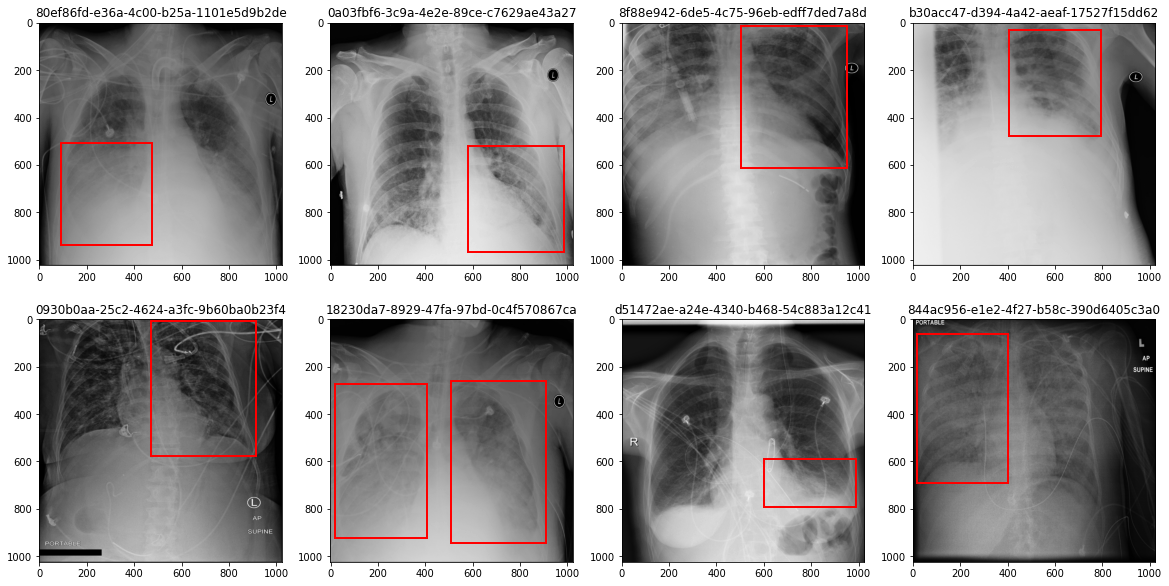

In [61]:
#Diplay the outlier image cases with bounding boxes
df = train_width_outliers.copy().reset_index(drop=True)

#Get some 6 random numbers and display those images
img_num = [np.random.randint(0, df.shape[0]) for i in range(8)]
display_image_and_bounding_boxes(df, img_num, img_path, fig_height = 20, fig_width = 10)

# EDA using AutoViz

In [ ]:
!pip install autoviz --quiet

Imported AutoViz_Class version: 0.0.81. Call using:
    from autoviz.AutoViz_Class import AutoViz_Class
    AV = AutoViz_Class()
    AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=0,
                            lowess=False,chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30)
Note: verbose=0 or 1 generates charts and displays them in your local Jupyter notebook.
      verbose=2 saves plots in your local machine under AutoViz_Plots directory and does not display charts.
Shape of your Data Set: (30227, 6)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  4
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  1


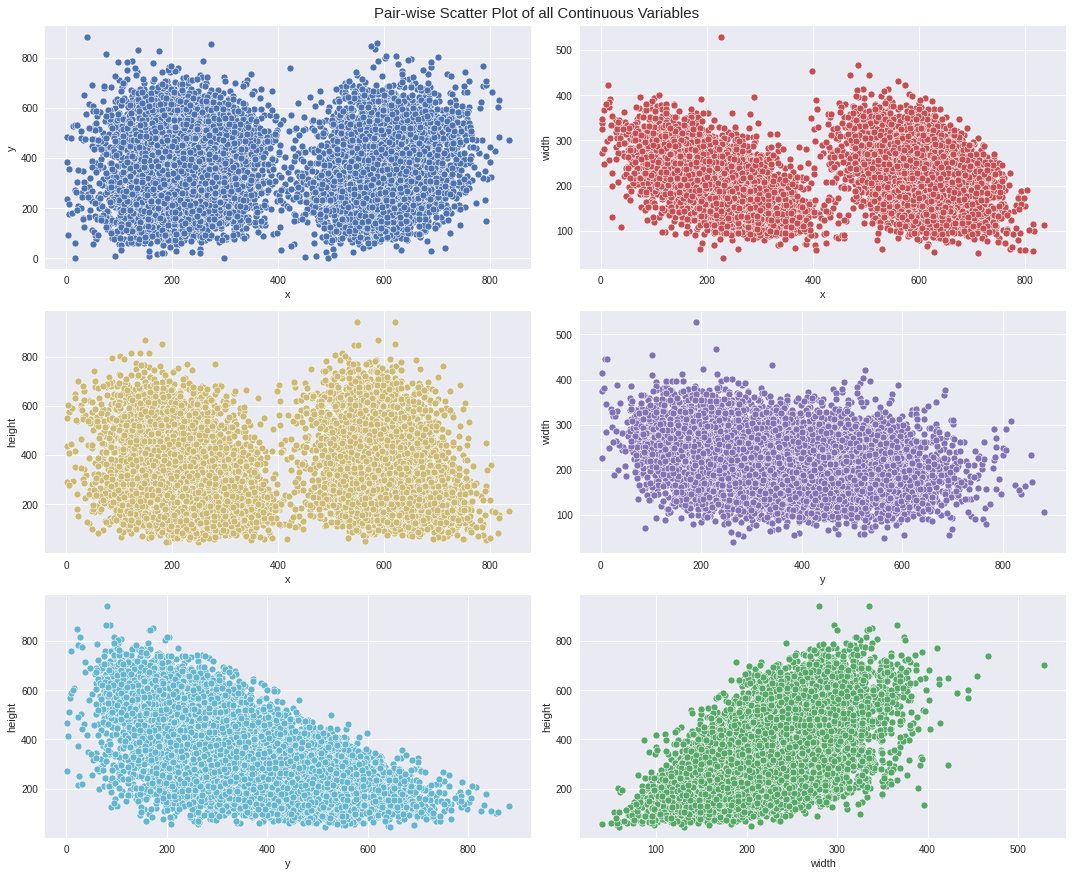

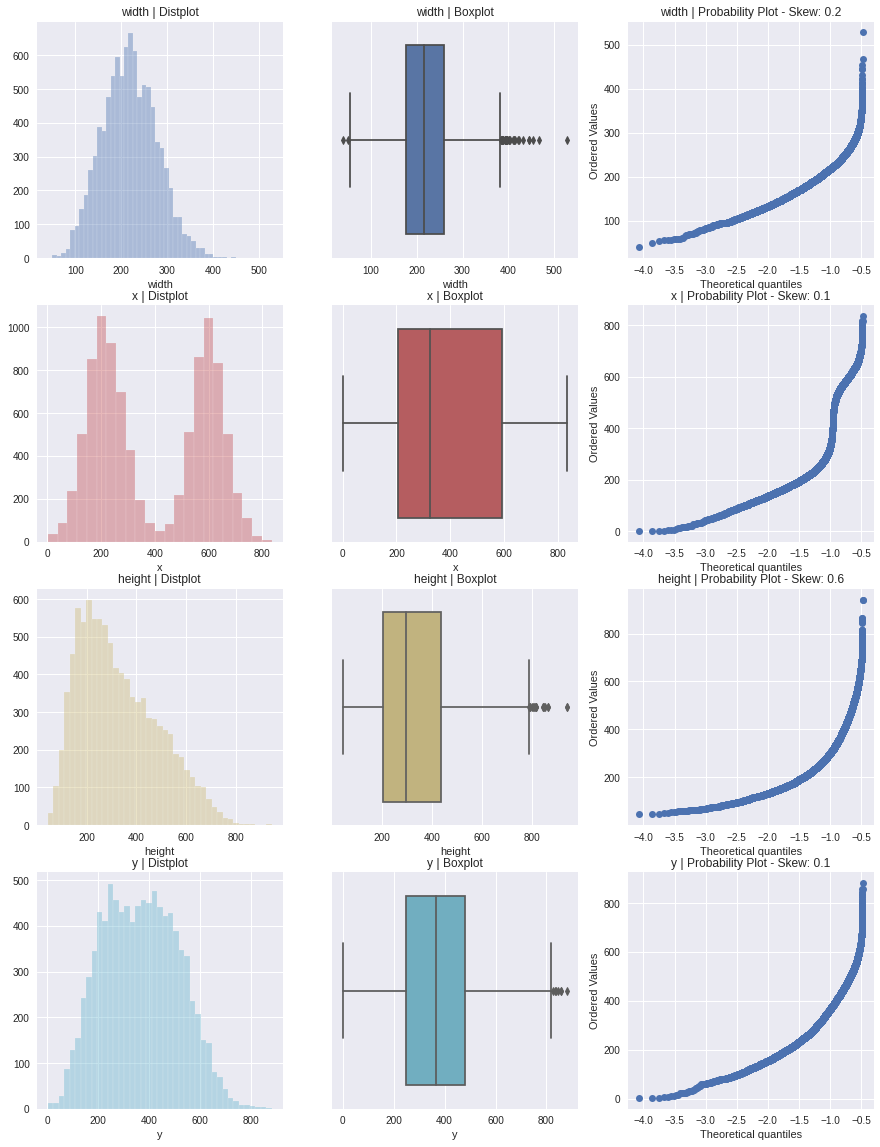

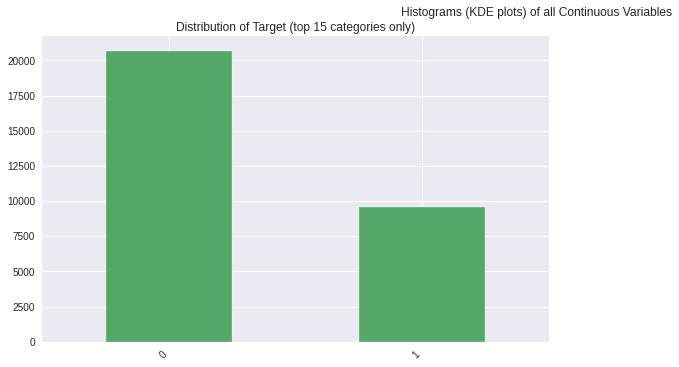

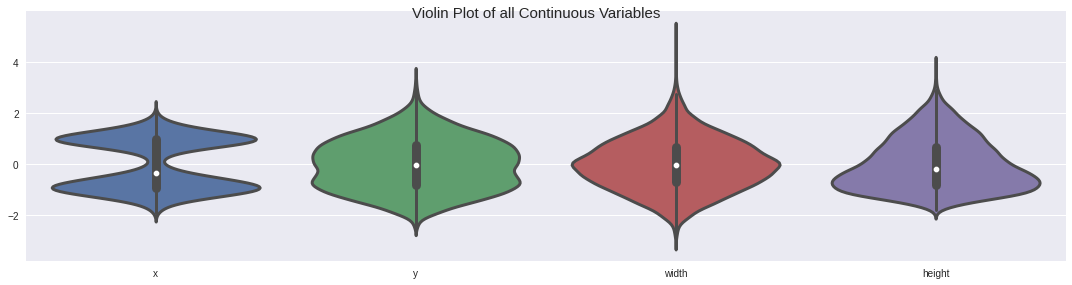

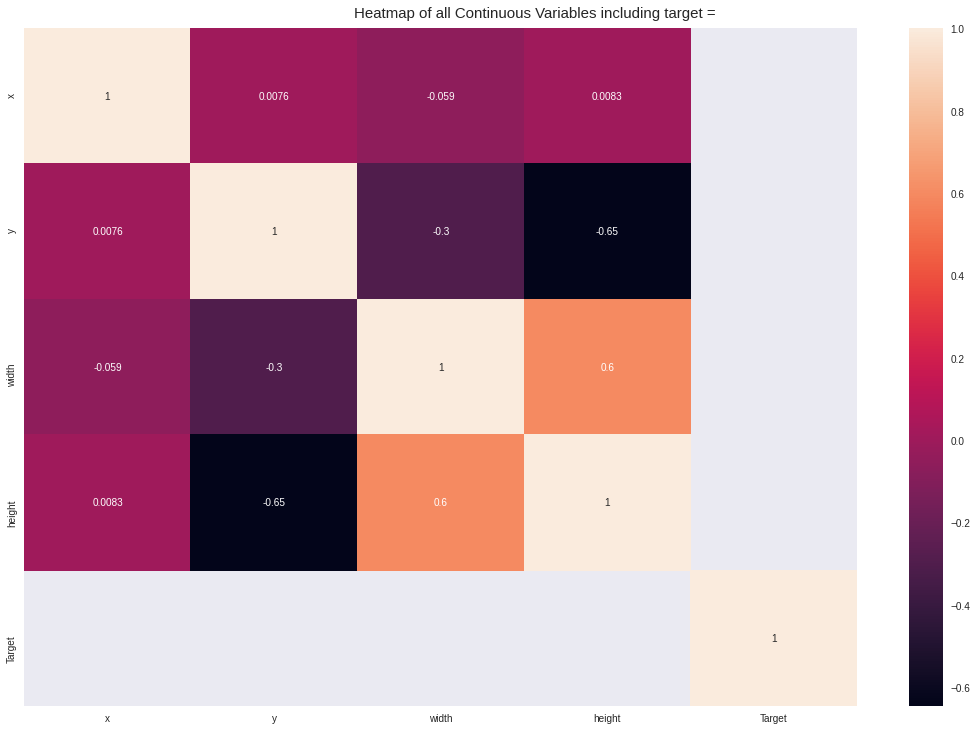

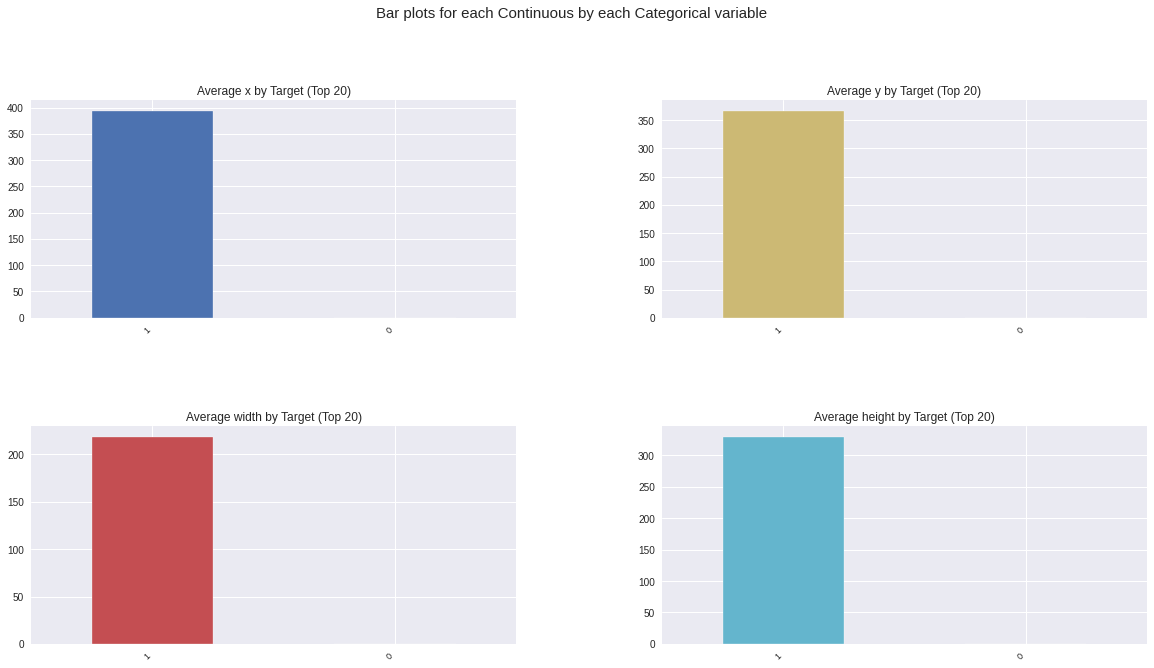

Time to run AutoViz (in seconds) = 8.739

 ###################### VISUALIZATION Completed ########################


,x,y,width,height,Target
0,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,0
4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...
30222,185.0,298.0,228.0,379.0,1
30223,NaN,NaN,NaN,NaN,0
30224,NaN,NaN,NaN,NaN,0
30225,570.0,393.0,261.0,345.0,1


In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()

AV.AutoViz('stage_2_train_labels.csv')

# EDA using D-Tale

In [ ]:
!pip install dtale --quiet

     |████████████████████████████████| 14.4MB 217kB/s 
     |████████████████████████████████| 71kB 8.5MB/s 
     |████████████████████████████████| 1.8MB 33.3MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 79.9MB 37kB/s 
     |████████████████████████████████| 13.2MB 244kB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 645kB 28.7MB/s 
     |████████████████████████████████| 194kB 41.7MB/s 
     |████████████████████████████████| 1.0MB 31.0MB/s 
     |████████████████████████████████| 3.5MB 32.5MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
     |████████████████████████████████| 1.8MB 15.0MB/s 
     |████████████████████████████████| 358kB 20.7MB/s 


In [ ]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_COLAB = True

dtale.show(train_labels_df)

https://tp1fh3m05mq-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/1

In [ ]:
dtale.show(train_df_mean_imputed)

https://tp1fh3m05mq-496ff2e9c6d22116-40000-colab.googleusercontent.com/dtale/main/2

# Data structures created during EDA

Data structures created during EDA are 
1. Training labels Dataframe   =========================> train_df
2. Class Detail Info Dataframe =========================> class_info_df
3. Imputed Training labels Dataframe ===================> train_df_mean_imputed
4. Training label height outliers Dataframe ============> train_height_outliers
5. Training label width outliers Dataframe =============> train_width_outliers
6. Training label y co-ordinate outliers Dataframe =====> train_y_outliers
7. Training postive cases data frame ===================> train_positive
8. Training negative cases data frame ==================> train_negative

We can refer them during model building baed on requirement


# MODEL BUILDING
1. Build a CNN classification and regression model using CNN
2. We will use VGG16 architecture for our CNN
3. Input will have our image array of predefined size
4. Output count will be C+4(1 classification and 4 for regression) initially 
5. We will use batch generator for training the model in batches
6. For losses we will use binary crossentrophy and IOU method for regression losses


1. We will use a fast rcn based model
2. We can use the previously saved model to retrain the model
3. We will then use a selective search algorithm to breakdown this feature map in to ROI's
4. We will use Classification layer and Regression layer for output
5. The number of outputs will be no of ROI * c+4


In [65]:
import tensorflow as tf
from PIL import Image
#Install imgaug
!pip install imgaug --quiet

In [66]:
import imgaug as ia
from imgaug import augmenters as iaa

In [68]:
# To reduce the complexity and computing ties we will reduce the image size to 128 as of now
image_size = 224
image_depth = 3
image_path = 'stage_2_train_jpeg_images'

In [69]:
# Sometimes(0.5, ...) applies the given augmenter in 50% of all cases,
sometimes = lambda aug: iaa.Sometimes(0.5, aug)

train_seq = iaa.Sequential([    
    #horizontal flips 50% of the time
    iaa.Fliplr(0.5),
    #Resize all images to a specific size    
    iaa.Resize({"height": image_size, "width": image_size}),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    # change brightness, DOES NOT AFFECT BBs
    iaa.Multiply((1.2, 1.5), per_channel=0.2),
    # translate by 40/60px on x/y axis
    # Rotate between 25 and -25 degrees
    # THIS AFFECTs BBs
    sometimes(iaa.Affine(
        translate_percent={"x": (-0.1, 0.1), "y": (-0.1, 0.1)},
        rotate=(-25, 25),
    ))
])

In [71]:
test_seq = iaa.Sequential([    
    #Resize all images to a specific size    
    iaa.Resize({"height": image_size, "width": image_size})
])

In [72]:
#Augmentation function to apply on a batch
def apply_aug(images, bboxes, aug_seq):
    
    #Number of images to process
    img_count = len(images)
    
    #Make sequence deterministic
    seq_det = aug_seq.to_deterministic()
    
    #Initialize boxes for all images
    boxes = []
    
    for i in range(img_count):
        
        b_box = ia.BoundingBox(x1 = bboxes[i][0],
                               y1 = bboxes[i][1],
                               x2 = bboxes[i][2],
                               y2 = bboxes[i][3])
        
        boxes.append(ia.BoundingBoxesOnImage([b_box], shape=images[i].shape))
    
    #Perform image and BBs augmentation
    image_aug = seq_det.augment_images(images)
    bbs_aug = seq_det.augment_bounding_boxes(boxes)
    
    b_images = np.zeros((img_count,image_size, image_size,image_depth))
    b_bboxes = np.zeros((img_count, 4))
    
    for i in range(img_count):
        b_images[i] = image_aug[i]
        box_new = bbs_aug[i].bounding_boxes[0]
        b_bboxes[i] = [box_new.x1,
                       box_new.y1, 
                       box_new.x2 - box_new.x1,
                       box_new.y2- box_new.y1]
    return b_images, b_bboxes

In [74]:
#Split data between train and validation set
#Get information on all images
all_images = train_df_median_imputed['patientId'].unique()
all_images.shape



(26684,)

In [75]:
#80% of the data will be used for training
mask = np.random.rand(all_images.shape[0]) < 0.8

#Get Training and Test images
train_images = all_images[mask]
test_images = all_images[~mask] 

train_images

array(['0004cfab-14fd-4e49-80ba-63a80b6bddd6',
       '00313ee0-9eaa-42f4-b0ab-c148ed3241cd',
       '00322d4d-1c29-4943-afc9-b6754be640eb', ...,
       'c1edf42b-5958-47ff-a1e7-4f23d99583ba',
       'c1f6b555-2eb1-4231-98f6-50a963976431',
       'c1f7889a-9ea9-4acb-b64c-b737c929599a'], dtype=object)

In [76]:
#Check number of images in training and test
train_images.shape, test_images.shape

((21451,), (5233,))

In [77]:
#Split dataframe between training and test
train_df = train_df_median_imputed[train_labels_df['patientId'].isin(train_images)]
test_df = train_df_median_imputed[train_labels_df['patientId'].isin(test_images)]

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [78]:
train_df

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,394.047724,366.83956,218.471376,329.269702,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,394.047724,366.83956,218.471376,329.269702,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,394.047724,366.83956,218.471376,329.269702,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,394.047724,366.83956,218.471376,329.269702,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.000000,152.00000,213.000000,379.000000,1,Lung Opacity
...,...,...,...,...,...,...,...
24259,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.000000,298.00000,228.000000,379.000000,1,Lung Opacity
24260,c1edf42b-5958-47ff-a1e7-4f23d99583ba,394.047724,366.83956,218.471376,329.269702,0,Normal
24261,c1f6b555-2eb1-4231-98f6-50a963976431,394.047724,366.83956,218.471376,329.269702,0,Normal
24262,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.000000,393.00000,261.000000,345.000000,1,Lung Opacity


In [79]:
#!mkdir stage_2_train_jpeg_images
#!ls -l
##Convert DICOM to PNG via openCV
#import os
#import glob

#inputdir = 'stage_2_train_images/'
#outdir = 'stage_2_train_jpeg_images/'

#test_list = [os.path.basename(x) for x in glob.glob(inputdir + './*.dcm')]

#for f in test_list:   
#    ds = dicom.read_file(inputdir + f) # read dicom image
#    img = ds.pixel_array # get image array
#    img = cv2.resize(img,(128,128))
#    cv2.imwrite(outdir + f.replace('.dcm','.png'),img) # write png image

#!zip stage_2_train_jpeg_images.zip stage_2_train_jpeg_images/*.png
#!cp stage_2_train_jpeg_images.zip '/gdrive/My Drive/Colab Notebooks/Projects'
!cp '/gdrive/My Drive/Colab Notebooks/Projects/stage_2_train_jpeg_images.zip' .
!unzip -q stage_2_train_jpeg_images.zip

In [80]:
def image_batch_generator(df, batch_size=32, train_mode=True):

    while True:

        #Create indexes
        image_nums = np.random.randint(0,df.shape[0], size=batch_size)

        #Create empty arrays
        #1. To hold image input
        batch_images = np.zeros(shape=(batch_size, image_size, image_size,3))

        #Classification Labels 
        batch_labels = np.zeros(shape=(batch_size))
        
        #Regression labels - 4 numbers per example image
        batch_bboxes = np.zeros(shape=(batch_size, 4))
        #List to hold all images which will be augmented
        all_images = []

        for i in range(batch_size):
            #Read image and resize
            img = tf.keras.preprocessing.image.load_img(image_path + '/' + df.loc[i, 'patientId'] +'.png', 
                                                       target_size=(image_size, image_size, 3))
            
            #Conver to numpy array
            img_array = tf.keras.preprocessing.image.img_to_array(img)            
            #ds = dicom.dcmread(image_path + '/' + df.loc[i, 'patientId']+'.dcm')
            #img_array = cv2.resize(ds.pixel_array,(64,64))
            #img_array = img_array.reshape(64,64,1)
            #Update batch
            #batch_images[i] = img_array
            all_images.append(img_array)
            #Read image classification label & convert to one hot vector
            cl_label = df.loc[image_nums[i], 'Target']
            #cl_label = tf.keras.utils.to_categorical(cl_label, num_classes=2)
            batch_labels[i] = cl_label

            #Read and resize bounding box co-ordinates
            img_width = df.loc[image_nums[i], 'width']
            img_height = df.loc[image_nums[i], 'height']
            
            xmin = df.loc[image_nums[i], 'x'] * image_size/img_width
            xmax = (xmin + img_width) * image_size/img_width

            ymin = df.loc[image_nums[i], 'y'] * image_size/img_height
            ymax = (ymin + img_height) * image_size/img_height

            #We will ask model to predict xmin, ymin, width and height of bounding box
            batch_bboxes[i] = [xmin, ymin, xmax, ymax]
        
        #Apply augmentation
        if(train_mode):
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, train_seq)
        else:
            batch_images, batch_bboxes = apply_aug(all_images, batch_bboxes, test_seq)

        #Make bounding boxes (x, y, w, h) as numbers between 0 and 1 - this seems to work better
        batch_bboxes = batch_bboxes/image_size

        #Return batch - use yield function to make it a python generator
        yield batch_images, [batch_labels, batch_bboxes]

In [81]:
gen = image_batch_generator(train_df_mean_imputed, batch_size=2)

In [82]:
gen

<generator object image_batch_generator at 0x7f99fa9f1ad0>

In [83]:
X, y= next(gen)

In [84]:
X.shape

(2, 224, 224, 3)

In [85]:
y

[array([1., 0.]), array([[-1.49312213,  0.47537473,  1.26583176,  0.75264227],
        [ 1.81362992,  1.14033971,  1.05627462,  0.66122896]])]

In [87]:
def calculate_iou(y_true, y_pred):
    
    
    """
    Input:
    Keras provides the input as numpy arrays with shape (batch_size, num_columns).
    
    Arguments:
    y_true -- first box, numpy array with format [x, y, width, height, conf_score]
    y_pred -- second box, numpy array with format [x, y, width, height, conf_score]
    x any y are the coordinates of the top left corner of each box.
    
    Output: IoU of type float32. (This is a ratio. Max is 1. Min is 0.)
    
    """

    
    results = []
    
    for i in range(0,y_true.shape[0]):
    
        # set the types so we are sure what type we are using
        y_true = np.array(y_true, dtype=np.float32)
        y_pred = np.array(y_pred, dtype=np.float32)

        #print(y_true.shape)
        #print(y_pred.shape)
        # boxTrue
        x_boxTrue_tleft = y_true[i,0]  # numpy index selection
        y_boxTrue_tleft = y_true[i,1]
        boxTrue_width = y_true[i,2]
        boxTrue_height = y_true[i,3]
        area_boxTrue = (boxTrue_width * boxTrue_height)

        # boxPred
        x_boxPred_tleft = y_pred[i,0]
        y_boxPred_tleft = y_pred[i,1]
        boxPred_width = y_pred[i,2]
        boxPred_height = y_pred[i,3]
        area_boxPred = (boxPred_width * boxPred_height)

        # calculate the bottom right coordinates for boxTrue and boxPred

        # boxTrue
        x_boxTrue_br = x_boxTrue_tleft + boxTrue_width
        y_boxTrue_br = y_boxTrue_tleft + boxTrue_height # Version 2 revision

        # boxPred
        x_boxPred_br = x_boxPred_tleft + boxPred_width
        y_boxPred_br = y_boxPred_tleft + boxPred_height # Version 2 revision


        # calculate the top left and bottom right coordinates for the intersection box, boxInt

        # boxInt - top left coords
        x_boxInt_tleft = np.max([x_boxTrue_tleft,x_boxPred_tleft])
        y_boxInt_tleft = np.max([y_boxTrue_tleft,y_boxPred_tleft]) # Version 2 revision

        # boxInt - bottom right coords
        x_boxInt_br = np.min([x_boxTrue_br,x_boxPred_br])
        y_boxInt_br = np.min([y_boxTrue_br,y_boxPred_br]) 

        # Calculate the area of boxInt, i.e. the area of the intersection 
        # between boxTrue and boxPred.
        # The np.max() function forces the intersection area to 0 if the boxes don't overlap.
        
        
        # Version 2 revision
        area_of_intersection = \
        np.max([0,(x_boxInt_br - x_boxInt_tleft)]) * np.max([0,(y_boxInt_br - y_boxInt_tleft)])

        iou = area_of_intersection / ((area_boxTrue + area_boxPred) - area_of_intersection)


        # This must match the type used in py_func
        iou = np.array(iou, dtype=np.float32)
        
        # append the result to a list at the end of each loop
        results.append(iou)
    
    # return the mean IoU score for the batch
    return np.mean(results)



def IoU(y_true, y_pred):
    
    # Note: the type float32 is very important. It must be the same type as the output from
    # the python function above or you too may spend many late night hours 
    # trying to debug and almost give up.
    
    iou = tf.py_function(calculate_iou, [y_true, y_pred], tf.float32)

    return iou

### Build VGG CNN Model

In [88]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()
#----------------------------------------------------------------
#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(image_size,image_size,3,)))

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3),padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))
#------------------------------------------------------------------------------
#128 filters

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#---------------------------------------------------------------------------

#Add Conv Layer

#normalize data
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3),padding='same', activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding ='same',activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(256, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),strides=2))
#---------------------------------------------------------------------------

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same', activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3),padding='same', activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

#---------------------------------------------------------------------------

#normalize data
model.add(tf.keras.layers.BatchNormalization())

#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))
#normalize data
model.add(tf.keras.layers.BatchNormalization())
#Add Conv Layer
model.add(tf.keras.layers.Conv2D(512, kernel_size=(3,3), padding='same',activation='relu'))

#Add Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2))

#---------------------------------------------------------------------------
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(4096, activation='relu'))
#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(4096, activation='relu'))
#Add Dropout
model.add(tf.keras.layers.Dropout(0.25))

last_layer = model.output

In [89]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     7

In [90]:
#Classification output
label_output = tf.keras.layers.Dense(1, 
                                     activation='sigmoid', 
                                     name='class_op')(last_layer)

#Regression
bbox_output = tf.keras.layers.Dense(4, 
                                    activation='sigmoid',
                                    name='reg_op')(last_layer)


In [91]:
#Non Sequential model as it has two different outputs
final_model = tf.keras.models.Model(inputs=model.input, #Pre-trained model input as input layer
                                    outputs=[label_output,bbox_output]) #Output layer added

In [92]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator(train_df) #batchsize can be changed
test_generator = image_batch_generator(test_df, train_mode=False)

In [93]:
X, y = next(train_generator)
print(X.shape)

(32, 224, 224, 3)


In [94]:
final_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
batch_normalization_input (Inpu [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 224, 224, 3)  12          batch_normalization_input[0][0]  
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 224, 224, 64) 1792        batch_normalization[0][0]        
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 224, 224, 64) 256         conv2d[0][0]                     
______________________________________________________________________________________________

In [95]:
#Saving the best model using model checkpoint callback
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('Pneumonia_detection_vgg.h5',
                                                    save_best_only=True, 
                                                    monitor='val_class_op_accuracy', 
                                                    mode='max',
                                                    verbose=1)

In [96]:
final_model.compile(optimizer='adam', 
                    loss={'reg_op':'mse', 'class_op':'binary_crossentropy'},
                    loss_weights={'reg_op':1, 'class_op':1},
                    metrics={'reg_op':[IoU], 'class_op':['accuracy']})

In [ ]:
final_model.fit(train_generator,
                epochs=100,
                steps_per_epoch= train_df.shape[0]//32,
                validation_data=test_generator,
                validation_steps = test_df.shape[0]//32,
                callbacks=model_checkpoint)

Epoch 1/100
758/758 [==============================] - 819s 1s/step - loss: 3.5266 - class_op_loss: 1.1290 - reg_op_loss: 2.3977 - class_op_accuracy: 0.6583 - reg_op_IoU: 0.0113 - val_loss: 2.6632 - val_class_op_loss: 0.6500 - val_reg_op_loss: 2.0133 - val_class_op_accuracy: 0.6700 - val_reg_op_IoU: 0.0049

Epoch 00001: val_class_op_accuracy improved from -inf to 0.67003, saving model to Pneumonia_detection_vgg.h5
Epoch 2/100
758/758 [==============================] - 771s 1s/step - loss: 2.6981 - class_op_loss: 0.6632 - reg_op_loss: 2.0349 - class_op_accuracy: 0.6671 - reg_op_IoU: 0.0313 - val_loss: 2.0331 - val_class_op_loss: 0.6362 - val_reg_op_loss: 1.3969 - val_class_op_accuracy: 0.6830 - val_reg_op_IoU: 0.0688

Epoch 00002: val_class_op_accuracy improved from 0.67003 to 0.68296, saving model to Pneumonia_detection_vgg.h5
Epoch 3/100
758/758 [==============================] - 770s 1s/step - loss: 2.9220 - class_op_loss: 0.6367 - reg_op_loss: 2.2853 - class_op_accuracy: 0.6841 - re

In [ ]:
final_model.save('Pneumonia_detection_manual_vgg16.h5')

NameError: ignored

# Simple CNN model


In [358]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(50,50,3)))
model.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu'))# hidden layer-1
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(64,(5,5),activation='relu')) # hidden layer -2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(128,(5,5),activation='relu'))# hidden layer -3
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten()) # flatten
model.add(tf.keras.layers.Dense(64,activation='relu'))# fully connected layer
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1))
model.add(tf.keras.layers.Activation('sigmoid'))

In [359]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_73 (Conv2D)           (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
dropout_62 (Dropout)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 18, 18, 64)        102464    
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_63 (Dropout)         (None, 9, 9, 64)        

In [360]:
#Create train and test generator
#batchsize = 32
train_generator = image_batch_generator(train_df) #batchsize can be changed
test_generator = image_batch_generator(test_df)
X, y = next(test_generator)
print(X.shape)
y.shape

(32, 50, 50, 3)


(32,)

In [361]:
test_df.shape[0]/32

187.9375

In [362]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [363]:
model.fit(train_generator,
                epochs=100,
                steps_per_epoch= train_df.shape[0]//32,
                validation_data=test_generator,
                validation_steps = test_df.shape[0]//32,
                callbacks=model_checkpoint)

Epoch 1/100
756/756 [==============================] - 28s 35ms/step - loss: 0.0000e+00 - accuracy: 0.6822 - val_loss: 0.0000e+00 - val_accuracy: 0.6731
Epoch 2/100
756/756 [==============================] - 26s 34ms/step - loss: 0.0000e+00 - accuracy: 0.6907 - val_loss: 0.0000e+00 - val_accuracy: 0.6698
Epoch 3/100
756/756 [==============================] - 26s 34ms/step - loss: 0.0000e+00 - accuracy: 0.6882 - val_loss: 0.0000e+00 - val_accuracy: 0.6872
Epoch 4/100
756/756 [==============================] - 26s 35ms/step - loss: 0.0000e+00 - accuracy: 0.6870 - val_loss: 0.0000e+00 - val_accuracy: 0.6611
Epoch 5/100
756/756 [==============================] - 26s 35ms/step - loss: 0.0000e+00 - accuracy: 0.6905 - val_loss: 0.0000e+00 - val_accuracy: 0.6785
Epoch 6/100
756/756 [==============================] - 26s 35ms/step - loss: 0.0000e+00 - accuracy: 0.6832 - val_loss: 0.0000e+00 - val_accuracy: 0.6805
Epoch 7/100
756/756 [==============================] - 26s 35ms/step - loss: 0.000

KeyboardInterrupt: ignored